# Part II - (PISA Data 2012)
## by (Charles Baba Odogun)


PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students( 15-year-olds) in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. . Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.


# Investigation Overview

This presentation first shows the correlation between the scores obtained by students in each of the 3 disciplines. And how other variables factored (Gender, location & Family sturctures) into the preparation of the student for thier future endeavors. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
student_clean = pd.read_csv('pisa_12_new.csv')

In [4]:
student_clean.head()

,CNT,OECD,NC,SCHOOLID,ST04Q01,ESCS,VER_STU,FAMSTRUC,HISCED,PV1MATH,PV1READ,PV1SCIE
0,Albania,Non-OECD,Albania,1,Female,NaN,2013-11-22,2.0,"ISCED 3A, ISCED 4",406.8469,249.5762,341.7009
1,Albania,Non-OECD,Albania,1,Female,NaN,2013-11-22,2.0,"ISCED 5A, 6",486.1427,406.2936,548.9929
2,Albania,Non-OECD,Albania,1,Female,NaN,2013-11-22,2.0,"ISCED 5A, 6",533.2684,401.2100,499.6643
3,Albania,Non-OECD,Albania,1,Female,NaN,2013-11-22,2.0,"ISCED 5A, 6",412.2215,547.3630,438.6796
4,Albania,Non-OECD,Albania,1,Female,NaN,2013-11-22,2.0,"ISCED 3A, ISCED 4",381.9209,311.7707,361.5628


## Mean Distribution of Scores
I want to identify the kind of distribution in each score variable. 
We see that all score variables follow a normal mean distribution,with scores ranging from 200 - 800 points and from all 3 scores we can see that majority of the students have the mean score of 500 points

In [5]:
# set color for all plots
base_color = sb.color_palette()[0]

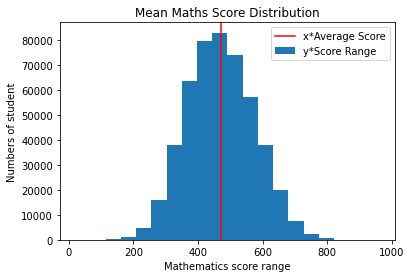

In [6]:
#To plot for the mean maths score distribution.
bins = np.arange(0, student_clean['PV1MATH'].max()+5,5)
plt.hist(data = student_clean, x = 'PV1MATH' , bins = 20);
plt.title('Mean Maths Score Distribution')
plt.xlabel('Mathematics score range')
plt.ylabel('Numbers of student')
plt.axvline(x=student_clean.PV1MATH.mean(), color='r')
plt.legend(['x*Average Score','y*Score Range'])

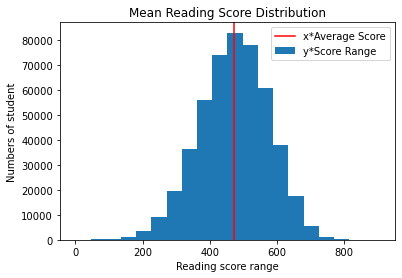

In [7]:
#To plot for the mean reading score distribution.
bins = np.arange(0, student_clean['PV1READ'].max()+5,5)
plt.hist(data = student_clean, x = 'PV1READ' , bins = 20);
plt.title('Mean Reading Score Distribution')
plt.xlabel('Reading score range')
plt.ylabel('Numbers of student')
plt.axvline(x=student_clean.PV1READ.mean(), color='r')
plt.legend(['x*Average Score','y*Score Range'])

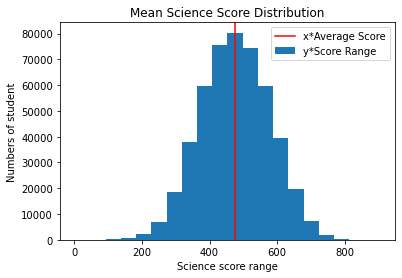

In [8]:
#To plot for the mean science score distribution.
bins = np.arange(0, student_clean['PV1SCIE'].max()+5,5)
plt.hist(data = student_clean, x = 'PV1SCIE' , bins = 20);
plt.title('Mean Science Score Distribution')
plt.xlabel('Science score range')
plt.ylabel('Numbers of student')
plt.axvline(x=student_clean.PV1SCIE.mean(), color='r')
plt.legend(['x*Average Score','y*Score Range'])

## Difference in performance in regards to gender
I want to identify the kind of distribution in each score variable in regards to the student genders. 
When we examine the bar charts below, you will notice that,in maths boys did more than girls, in reading girls were better readers and in the science, there isnt much difference in their perfomance.

In [9]:
def ploting (var_1,var_2,title):
    plt.figure(figsize=[8, 5])
    student_clean.groupby(var_1).mean()[var_2].plot(kind='bar')
    plt.title(title)
    plt.xlabel('Gender')
    plt.ylabel('Mean Scores')

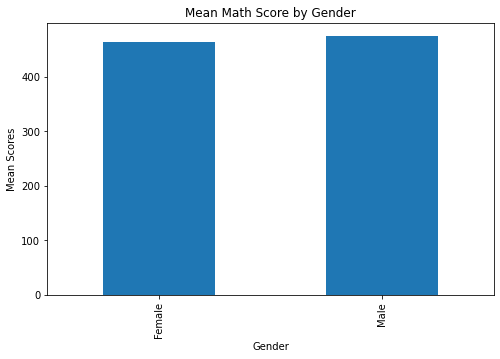

In [10]:
ploting('ST04Q01','PV1MATH', 'Mean Math Score by Gender')

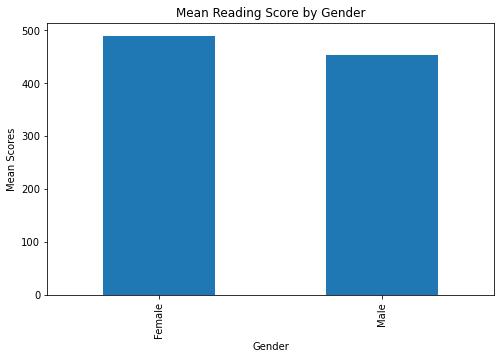

In [11]:
ploting('ST04Q01','PV1READ', 'Mean Reading Score by Gender')

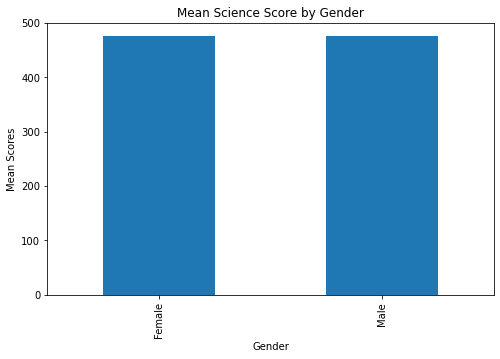

In [12]:
ploting('ST04Q01','PV1SCIE', 'Mean Science Score by Gender')

## Countries distribution
I want to identify the kind of distribution of the economies that are represented in our data set. From the chart below. we discover that Mexico has the highest number of students with 33806, followed by Italy with 31073,Spain with 25313 and Canada 21544 students.

Text(0.5, 0, 'Countries')

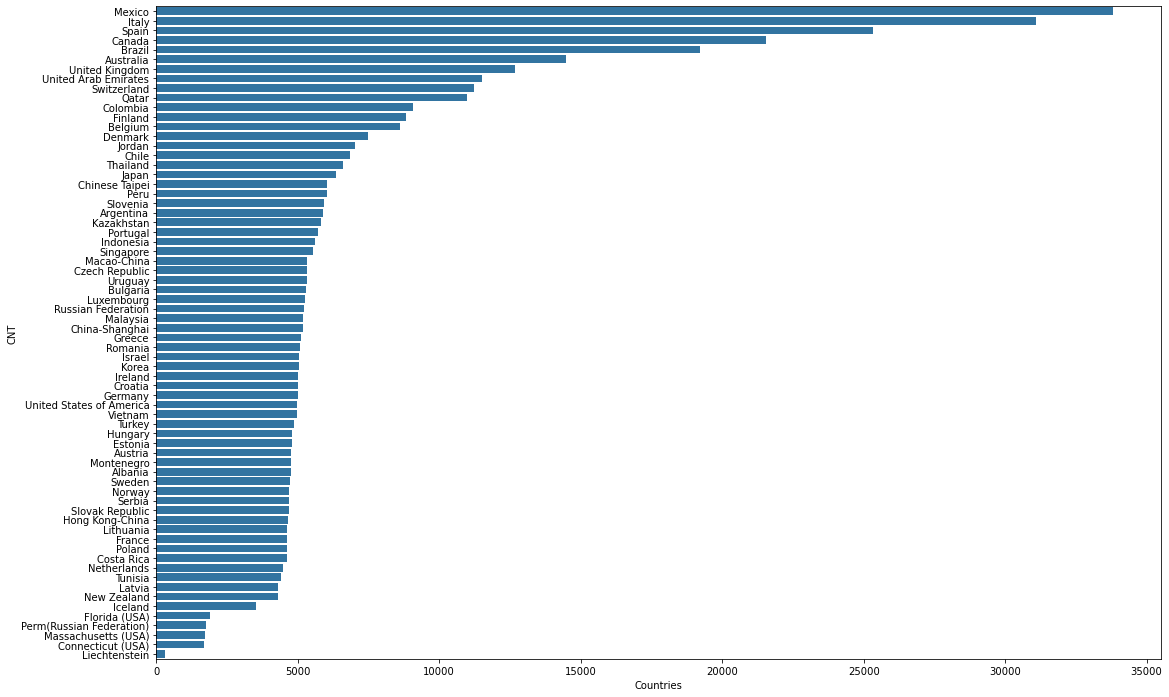

In [13]:
cnt_count = student_clean.CNT.value_counts()

plt.figure(figsize=[18,12])
cnt_title = cnt_count.index
sb.countplot(data = student_clean, y = 'CNT', color = base_color, order=cnt_title)
plt.xlabel('Countries')

# Family structure distribution

I want to identify the kind of family structures distribution of the students from economies that are represented in our data set. And from what we can see , there are lots of students from a two family structure. 


Text(0, 0.5, 'Number Of Students')

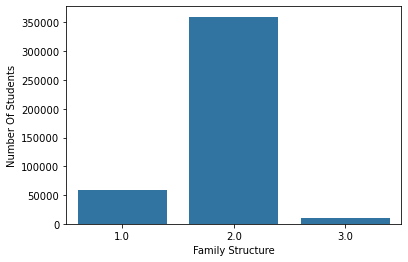

In [14]:
#Plot of the family structures.
sb.countplot(data = student_clean, x = 'FAMSTRUC', color = base_color)
plt.xlabel('Family Structure')
plt.ylabel('Number Of Students')

## OECD Countries distribution
I want to check the performance of students from both OECD and Non- OECD countires in all three duscipline. And from the pie chart below, student from OECD countires performed better in all discipline. 

In [15]:
def ploting_1 (var_1,var_2,title):
    plt.figure(figsize=[8, 5])
    student_clean.groupby(var_1).mean()[var_2].plot(kind='pie', startangle = 90, counterclock = False, autopct='%1.0f%%')
    plt.title(title)
    plt.xlabel('Students')
    plt.ylabel('Mean Scores')

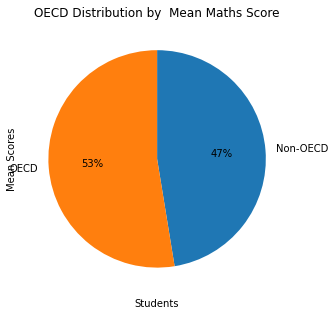

In [16]:
ploting_1('OECD','PV1MATH','OECD Distribution by  Mean Maths Score')

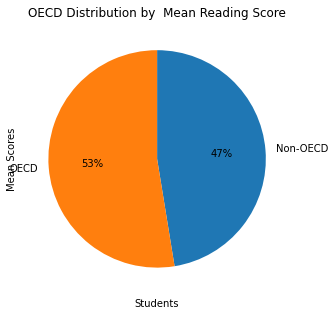

In [17]:
ploting_1('OECD','PV1READ','OECD Distribution by  Mean Reading Score')


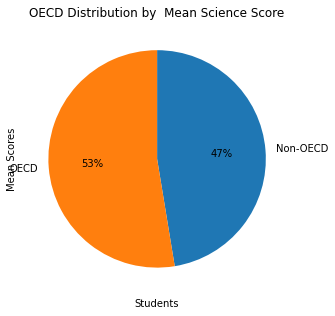

In [18]:
ploting_1('OECD','PV1SCIE','OECD Distribution by  Mean Science Score')

## Mean Score by Countries
When we check the mean score by location, as we can observe from the bar chart below , we will notice that China comes top in all the subjects, followed by Hong Kong, Singapore , Vietnam.

In [26]:
def ploting_2 (var_1,var_2,title):
    plt.figure(figsize=[12, 8])
    student_clean.groupby(var_1).mean()[var_2].plot(kind='bar')
    plt.title(title)
    plt.xlabel('Countries')
    plt.ylabel('Mean Scores')

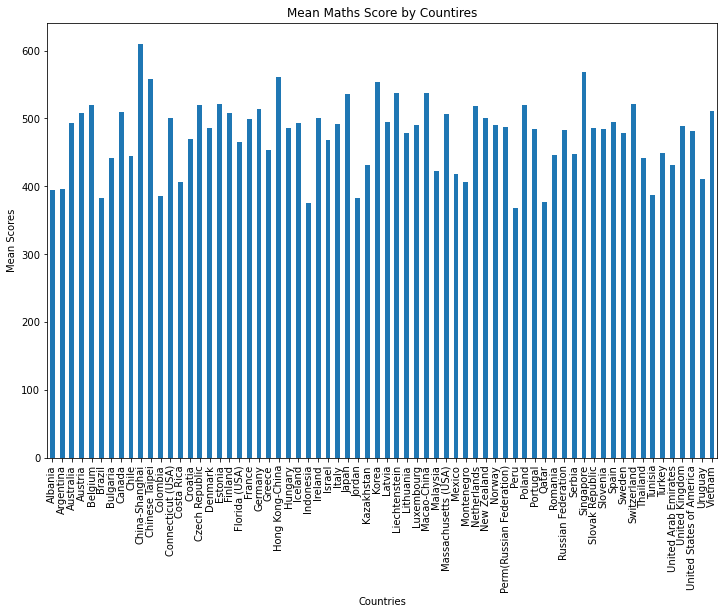

In [27]:
ploting_2('CNT','PV1MATH','Mean Maths Score by Countires')


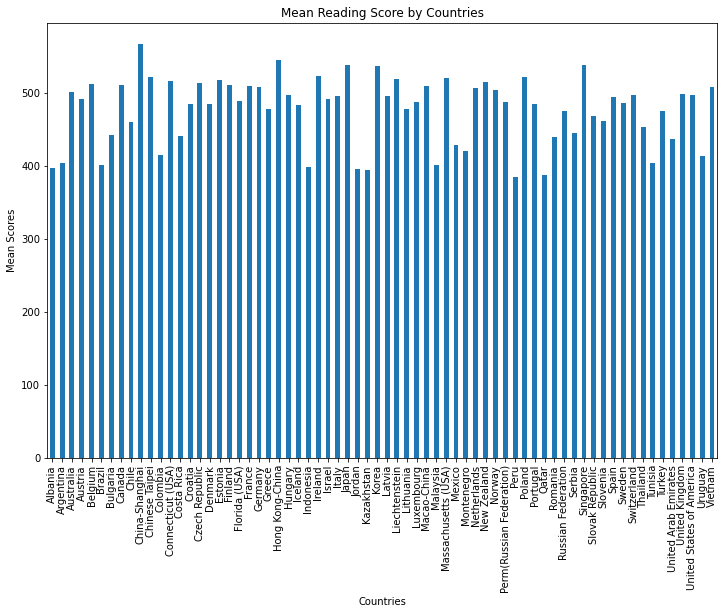

In [28]:
ploting_2('CNT','PV1READ','Mean Reading Score by Countries')


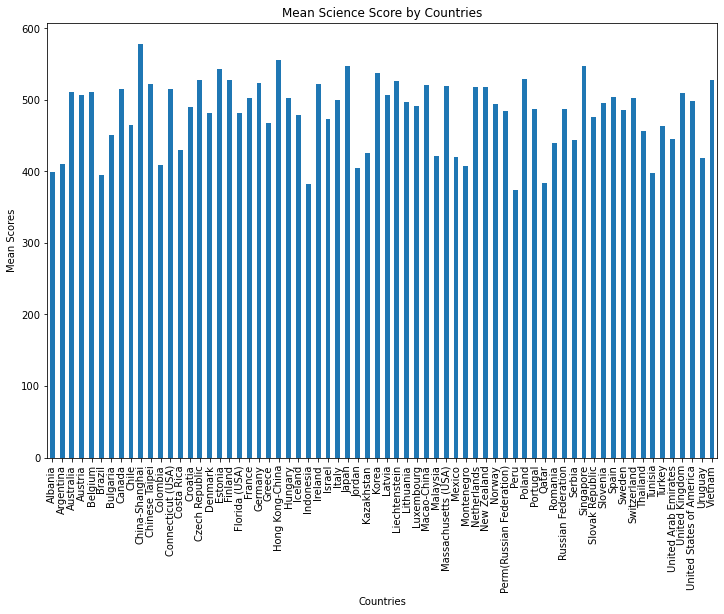

In [29]:
ploting_2('CNT','PV1SCIE','Mean Science Score by Countries')

# Conclusion: 
- We can see that from our charts above;
   - The average scores of the students were around 500 scores. 
   - The boys performed better in some discipline like maths, girls performed better in Reading, no significant   differences in science.
   - Mexico had the highest amoount of students that participated. 
   - Most students are from a 2 family structure. 
   - Students from OECD countires performed better than those from Non-OECD countires. 
   - When we check the mean score by location , we dsicovered that students from China comes top in all the subjects, followed by Hong Kong, Singapore , Vietnam.